In [ ]:
### Урок 11. Jupyter Notebook и несколько слов об аналитике
вот вариант ДЗ чисто по лекции Сергея

f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

Определить корни

Найти интервалы, на которых функция возрастает

Найти интервалы, на которых функция убывает

Построить график

Вычислить вершину

Определить промежутки, на котором f > 0

Определить промежутки, на котором f < 0

Мое же ДЗ - проанализировать любой датасет , который вам нравится (например, Титаник), найти интересные факты и зависимости, визуализировать результаты если получится.

Сдавать ДЗ как файл .ipynb или ссылкой на гитхаб как обычно.

In [2]:
from sympy import *

In [3]:
from sympy.plotting import plot

In [4]:
init_printing()

In [5]:
x = Symbol('x')

In [136]:
f = 5*x**2 + 10*x

In [137]:
f.subs(x,-0.5)

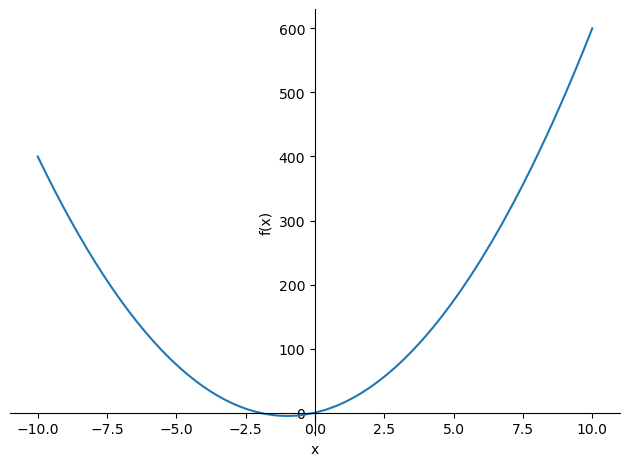

5*x**2 + 10*x


In [138]:
plot(f)
print(f)

In [139]:
# Начальник, где бурут такие уравнения?
function_string = '-12*x**4*sin(cos(x)) - 18*x**3+5*x**2 + 10*x'

ans = solve(f,x)

In [140]:
print(ans)

[-2, 0]


In [20]:
#--------------------------------- Решение ДЗ по части Титаника -----------------------------------------------

In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import missingno as msno

In [4]:
surv = pd.read_csv("/Users/rafaelrezyapov/Documents/titanic/gender_submission.csv")

In [5]:
surv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [6]:
test = pd.read_csv("/Users/rafaelrezyapov/Documents/titanic/test.csv")

In [7]:
train = pd.read_csv("/Users/rafaelrezyapov/Documents/titanic/train.csv")

In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

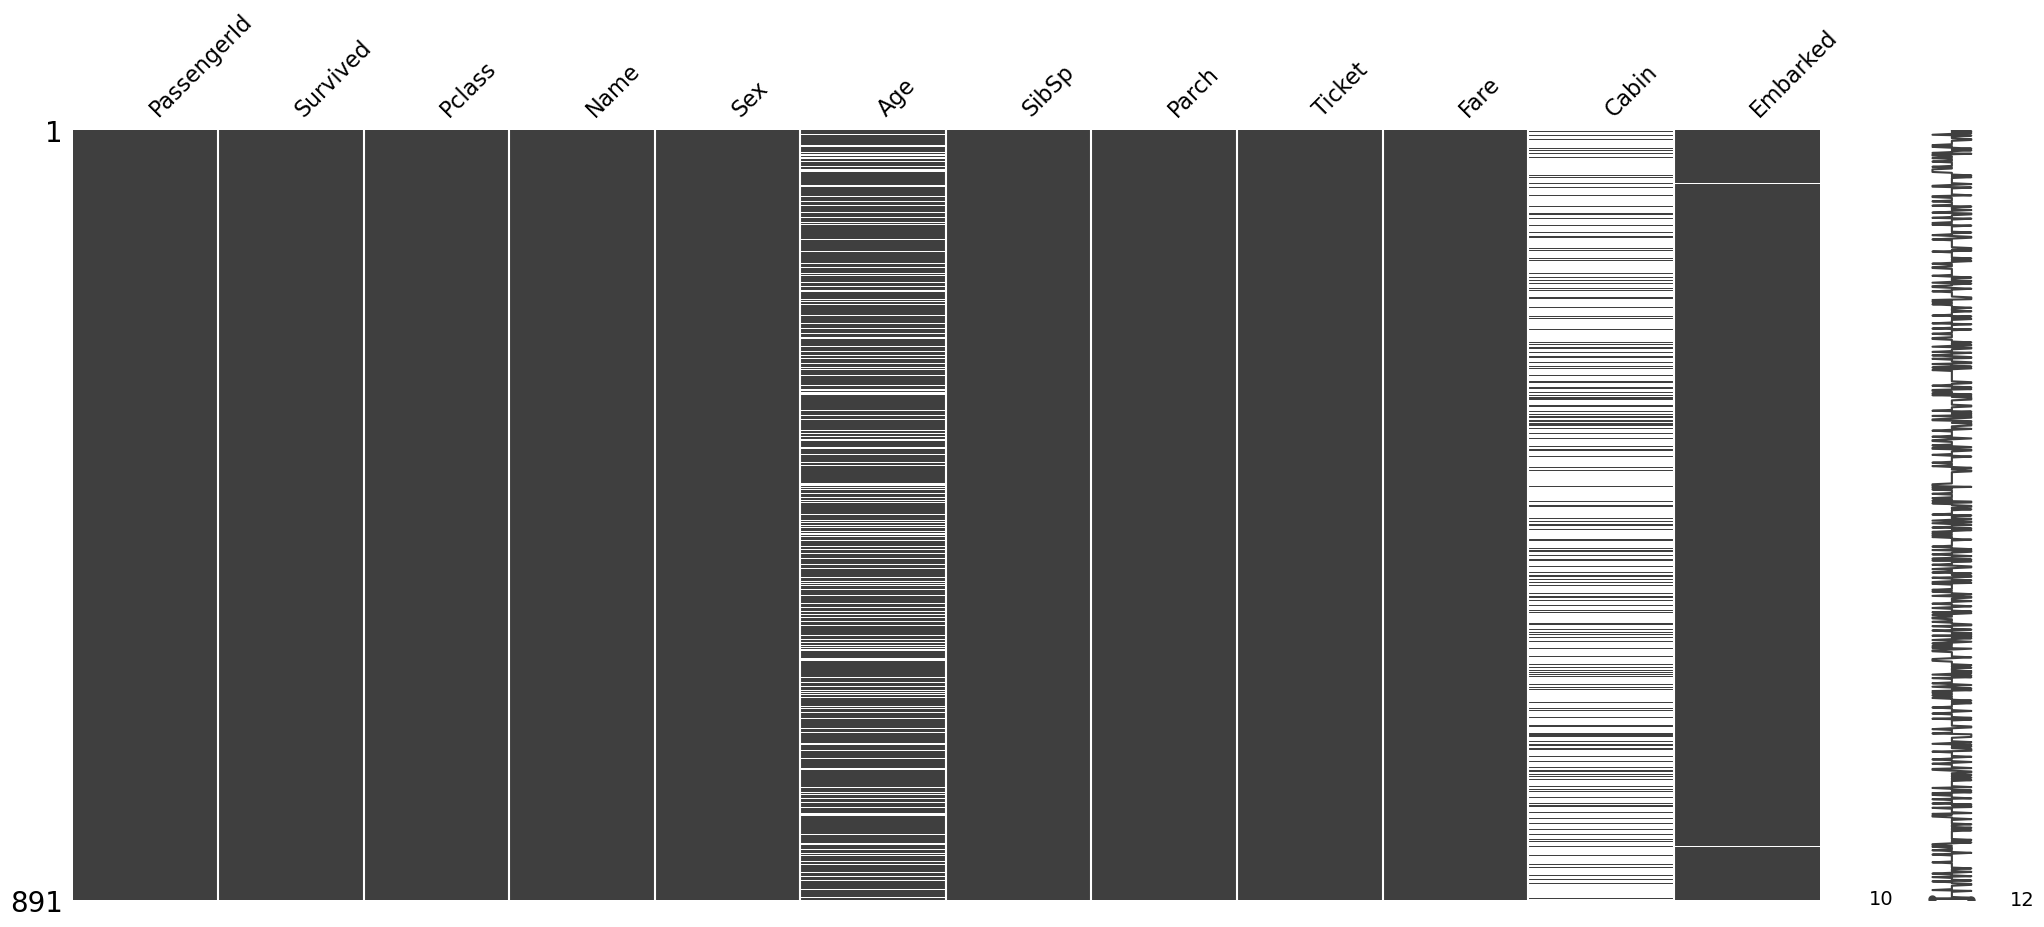

In [11]:
msno.matrix(train)

<AxesSubplot:>

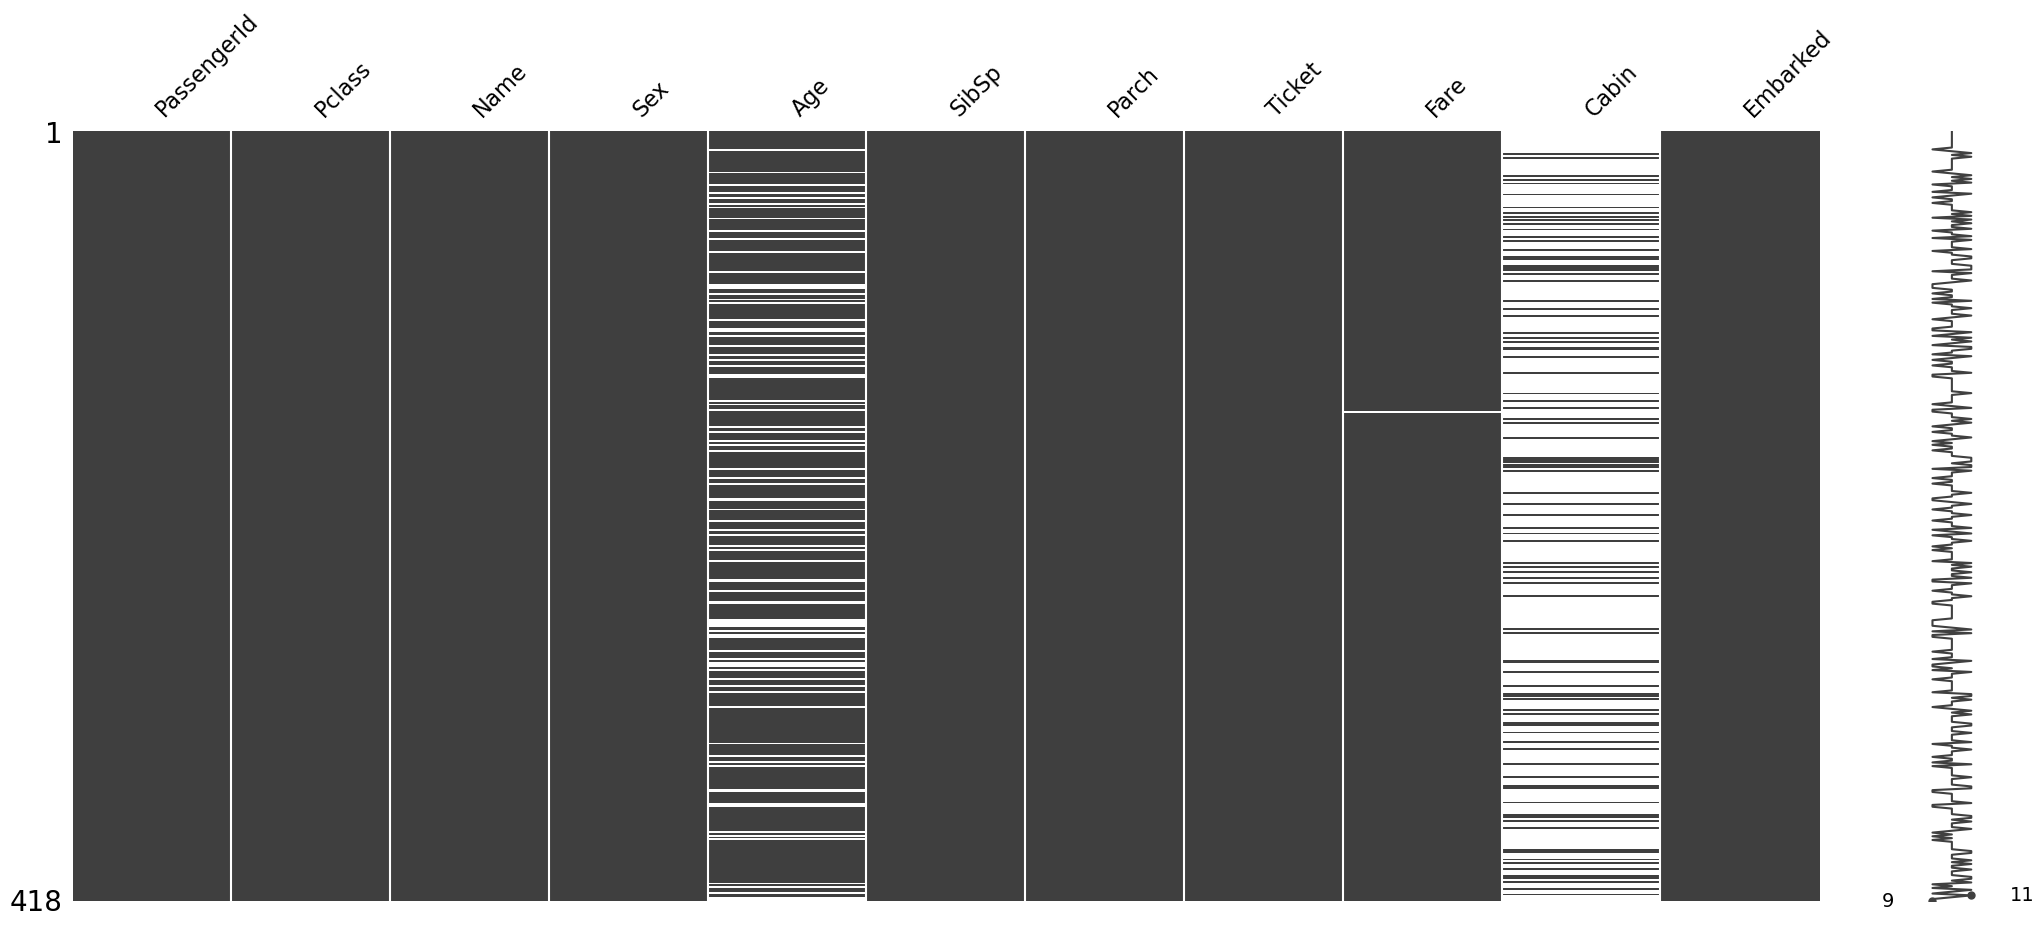

In [12]:
msno.matrix(test)

In [13]:
df = test.merge(surv,on='PassengerId', how = 'right')


In [14]:
tf = pd.concat([df,train])

<AxesSubplot:>

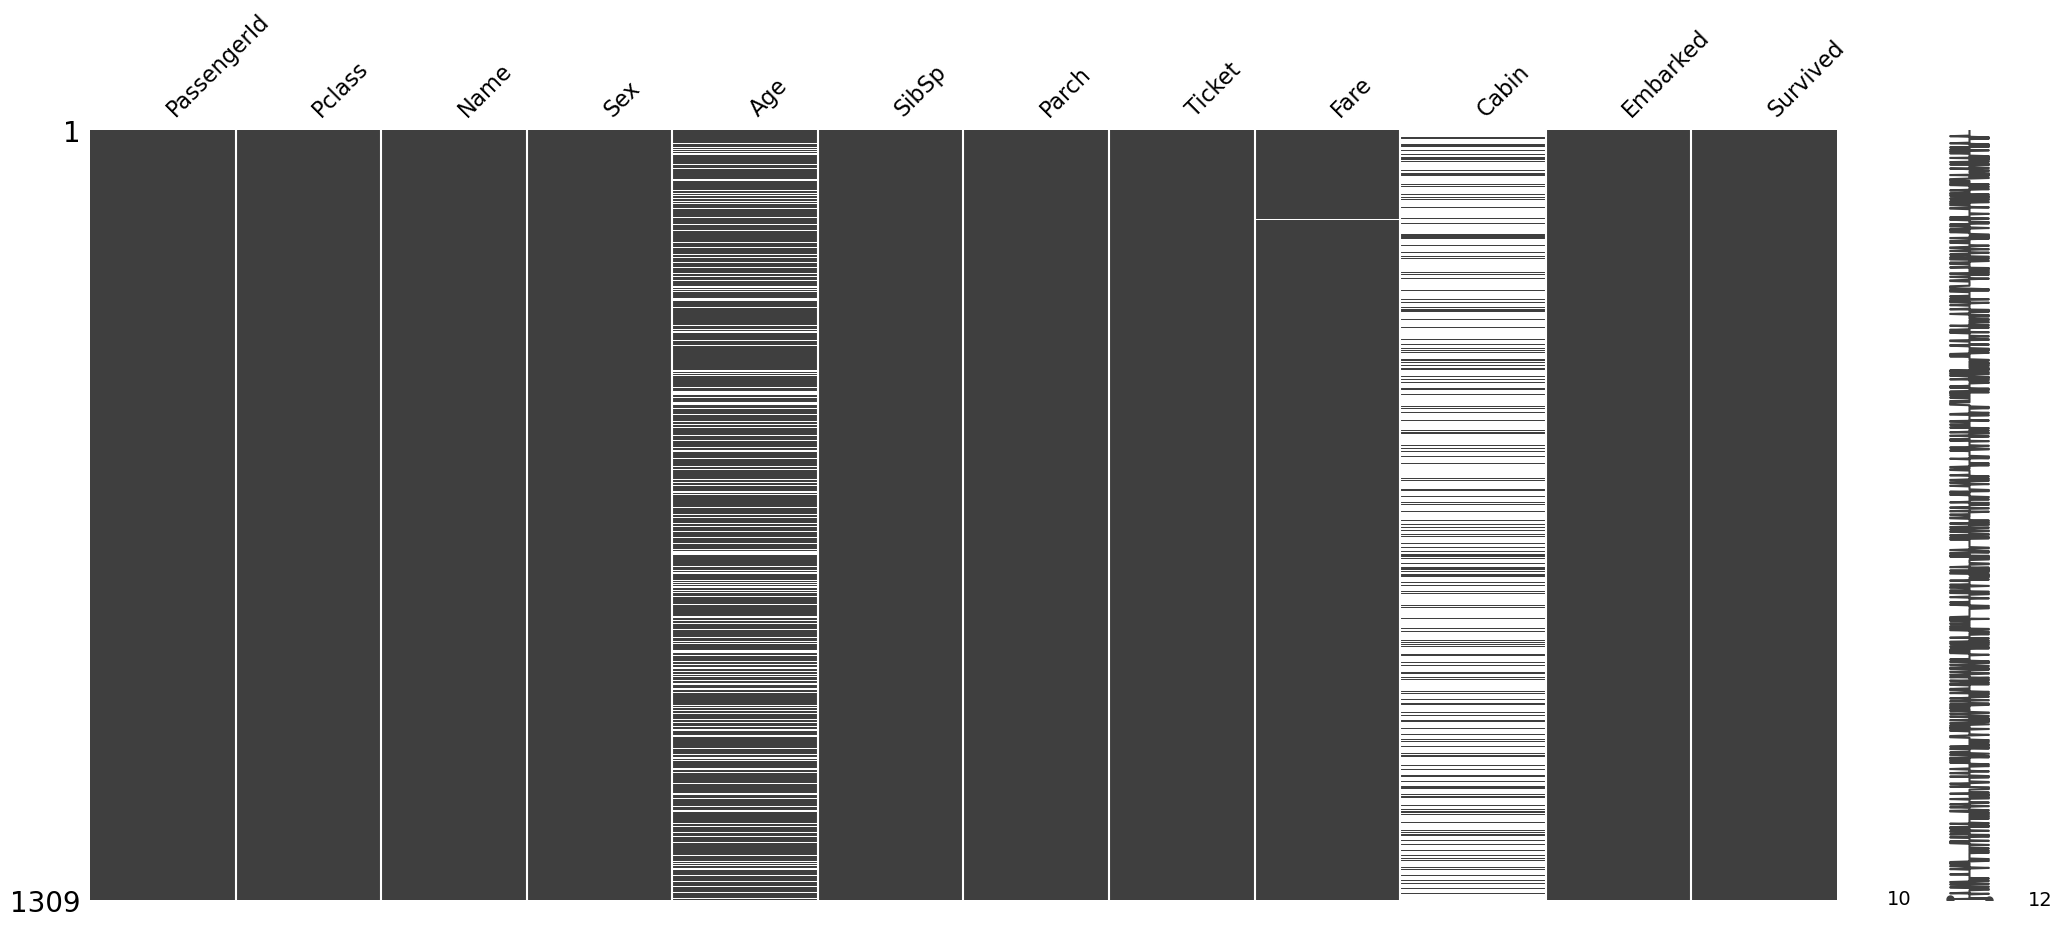

In [15]:
msno.matrix(tf)

In [16]:
tf.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


In [17]:
tf.tail(50)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
841,842,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S,0
842,843,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C,1
843,844,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C,0
844,845,3,"Culumovic, Mr. Jeso",male,17.0,0,0,315090,8.6625,NaN,S,0
845,846,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,0
846,847,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,0
847,848,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C,0
848,849,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,NaN,S,0
849,850,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C,1
850,851,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,0


In [18]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [19]:
tf.groupby('Sex')['PassengerId'].count()

Sex
female    466
male      843
Name: PassengerId, dtype: int64

In [20]:
tf.groupby('Embarked')['PassengerId'].count()

Embarked
C    270
Q    123
S    914
Name: PassengerId, dtype: int64

In [21]:
tf.groupby('Pclass')['PassengerId'].count()

Pclass
1    323
2    277
3    709
Name: PassengerId, dtype: int64

In [22]:
tf.groupby('Survived')['PassengerId'].count()

Survived
0    815
1    494
Name: PassengerId, dtype: int64

In [23]:
# женщины  готовы платить больше за джорней (или этот инвестиции?)
tf.groupby('Sex')['Fare'].mean()

Sex
female    46.198097
male      26.154601
Name: Fare, dtype: float64

In [24]:
tf.groupby('Sex')['Age'].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [25]:
aa=tf.groupby(['Sex'])['PassengerId'].count()

In [26]:
tf.groupby(['Sex'])['Survived'].sum()

Sex
female    385
male      109
Name: Survived, dtype: int64

In [27]:
bb = tf.groupby(['Sex', 'Pclass'])['PassengerId'].count()

In [28]:
tf.groupby(["Sex"])['PassengerId'].count()

Sex
female    466
male      843
Name: PassengerId, dtype: int64

In [29]:
# распределение женщин по классам кают
# дамы-то побогаче были (или менее жадные?)

(bb/aa*100).round(2)

Sex     Pclass
female  1         30.90
        2         22.75
        3         46.35
male    1         21.23
        2         20.28
        3         58.48
Name: PassengerId, dtype: float64

In [30]:
# распределение женщин по классам кают
f_ratio = pd.DataFrame([144/466, 106/466, 216/466])

In [31]:
f_ratio.round(2)*100

,0
0,31.0
1,23.0
2,46.0


In [32]:
# дамы-то побогаче были (или менее жадные?)

In [33]:
# распределение мужчин по классам кают
m_ratio = pd.DataFrame([179/843, 171/843, 493/843])

In [34]:
m_ratio.round(2)*100

,0
0,21.0
1,20.0
2,58.0


In [35]:
tf.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [36]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [37]:
# кто больше выжил (почему интересно?)
aa=tf.groupby(['Sex'])['Survived'].sum()

In [38]:
tf.groupby(['Sex'])['Survived'].count()

Sex
female    466
male      843
Name: Survived, dtype: int64

In [39]:
(bb/aa*100).round(2)

Sex     Pclass
female  1          37.40
        2          27.53
        3          56.10
male    1         164.22
        2         156.88
        3         452.29
dtype: float64

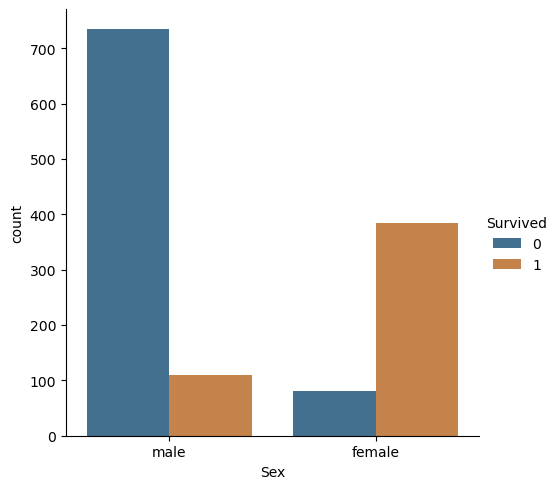

In [40]:
# кто больше выжил посмотрим на гистограмме
sns.catplot(data = tf,hue = 'Survived', x = 'Sex',
            kind='count', saturation=0.5)

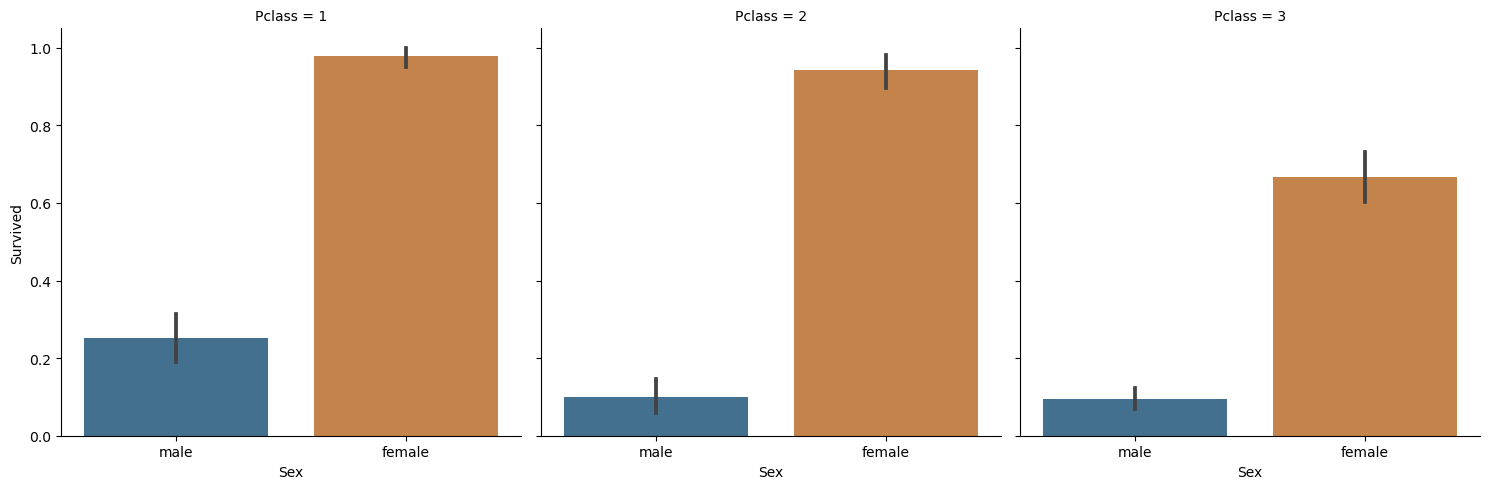

In [41]:
sns.catplot(data = tf,y='Survived',x='Sex',col='Pclass',
            kind='bar', saturation=0.5)

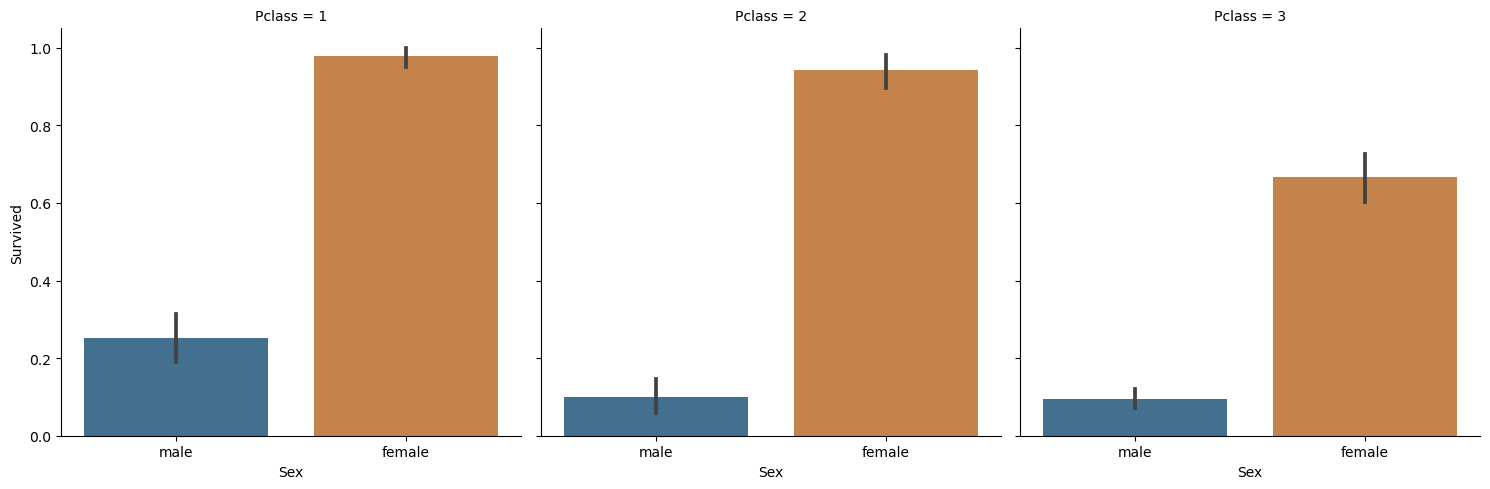

In [42]:
sns.catplot(data = tf,y='Survived',x='Sex',col='Pclass',
            kind='bar', saturation=0.5)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

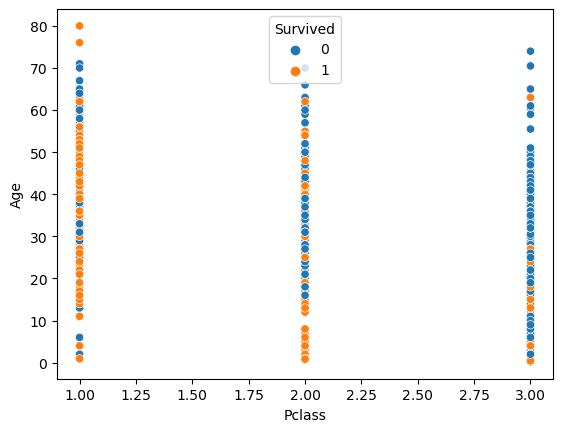

In [49]:
#sns.scatterplot(data=df, x="latitude", y="longitude",  hue="median_house_value")
sns.scatterplot(data = tf, x = 'Pclass', y = 'Age', hue = 'Survived')
#sns.scatterplot(data = tf, x = 'Pclass', y = 'Age', hue = 'Sex', size = 'Survived')

In [50]:
tf.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


/Users/rafaelrezyapov/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

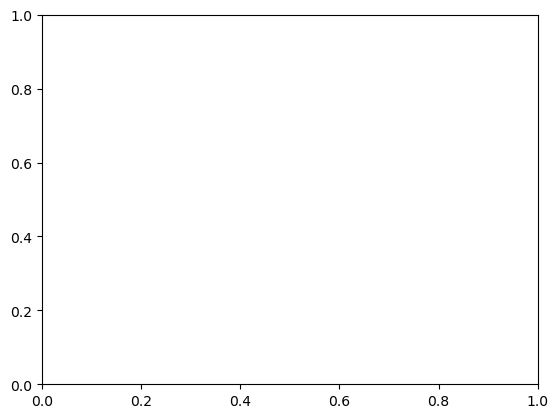

In [52]:
sns.histplot(data=tf, x="Pclass")